# START

In [218]:
# importing necessory Libraries necessory for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [219]:
# Load dataset
df = pd.read_csv('car_data.csv')
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [221]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [222]:
df.shape

(301, 9)

**Data is cleaned!**

# Data Transformation

In [223]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

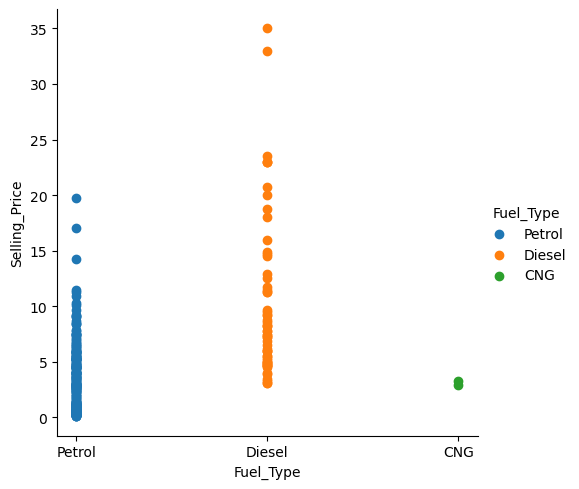

In [224]:
sns.FacetGrid(df, hue='Fuel_Type', height=5).map(plt.scatter, "Fuel_Type", "Selling_Price").add_legend()

**There are very few CNG cars. That can be neglected.**

In [225]:
# Rows of 'Fule_Type' 'CNG' removing...
df=df[df['Fuel_Type']!='CNG']

**Removed CNG**

In [226]:
df['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [227]:
df['Transmission'].value_counts()

Transmission
Manual       259
Automatic     40
Name: count, dtype: int64

In [228]:
df['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

In [229]:
# 1 car with 3 ownership can be neglected
df=df[df['Owner']!=3]

**Row removed with 1 car with 3 ownerships**

### Data Transforamtion

In [230]:
# These columns need to be transformed into integers
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1}}, inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}}, inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [231]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0


**OutLier Removal**

In [232]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,2013.657718,4.679027,7.582584,36555.741611,0.201342,0.352349,0.130872,0.033557
std,2.866906,5.105225,8.634349,38594.967809,0.401678,0.478506,0.337828,0.180389
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.825000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.700000,6.250000,31802.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.887500,47750.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,1.000000,1.000000,1.000000,1.000000


**Here we notices that there is a minimum change from 25%,50%,75%, But then a huge change from 6 -> 35 in Selling_Price**

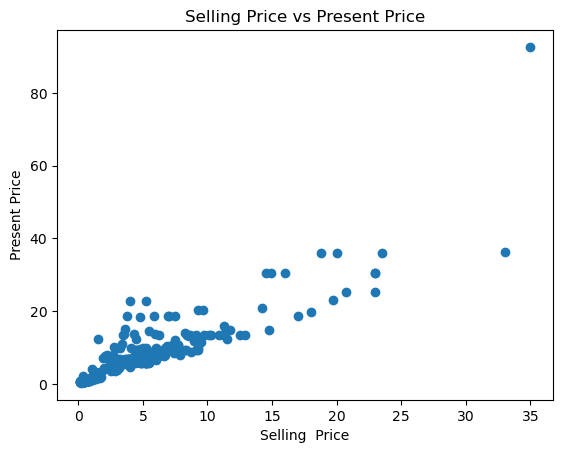

In [233]:
# Scatter plot to see Selling_Price vs Present_Price
plt.scatter(df['Selling_Price'],df['Present_Price'])
plt.xlabel('Selling  Price')
plt.ylabel('Present Price')
plt.title("Selling Price vs Present Price")
plt.show()

<Axes: >

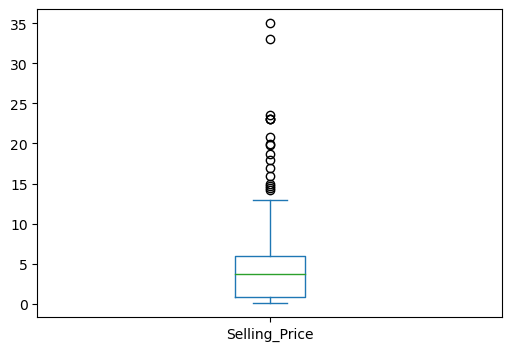

In [234]:
df['Selling_Price'].plot(kind='box', figsize=(6,4)) # iloc -> first ':' is row selector and second ':' is column selector 

In [235]:
df[df['Selling_Price']>25e0] # shows cars with more than 25lacs

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
64,fortuner,2017,33.0,36.23,6000,1,0,1,0
86,land cruiser,2010,35.0,92.60,78000,1,0,0,0


In [236]:
df[df['Present_Price']>40e0] # shows cars with more than 40lacs

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,1,0,0,0


In [237]:
# extract cars below 25lac
df=df[df['Selling_Price']<15e0].reset_index(drop=True)
df=df[df['Present_Price']<40e0].reset_index(drop=True)

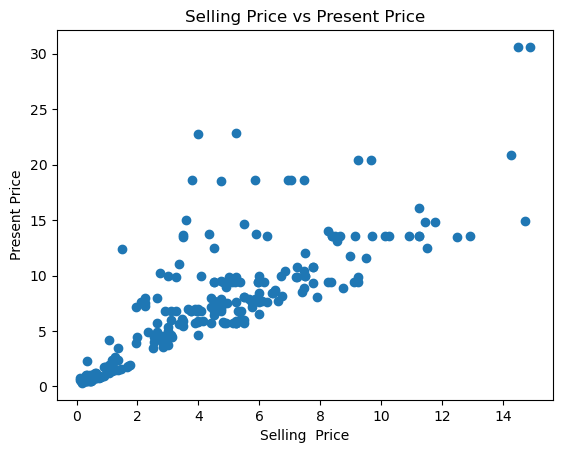

In [238]:
# Scatter plot to see Selling_Price vs Present_Price
plt.scatter(df['Selling_Price'],df['Present_Price'])
plt.xlabel('Selling  Price')
plt.ylabel('Present Price')
plt.title("Selling Price vs Present Price")
plt.show()

**Data is ready for model training** 

# Model Training

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [240]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Car_Name','Selling_Price']),
                                                   df['Selling_Price'],
                                                   test_size = 0.2, random_state=100)
x_train.shape, x_test.shape

((228, 7), (57, 7))

In [241]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

**Model Evaluation**

In [242]:
predict = model.predict(x_test)

In [243]:
error_score = metrics.r2_score(y_test, predict)
print('R squared error: ', error_score)

R squared error:  0.8755060948937695


# Best random_state value for r2_score

In [244]:
scores=[]
for i in range(1000):
    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Car_Name','Selling_Price']),
                                                        df['Selling_Price'],
                                                        test_size = 0.2, random_state=i)
    model = LinearRegression()
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    
    scores.append(metrics.r2_score(y_test, predict))

In [245]:
print('Best random_state value with highest r2_score: ',np.argmax(scores))
print('Best r2_score: ', scores[np.argmax(scores)])

Best random_state value with highest r2_score:  833
Best r2_score:  0.9254889583215987


**Model has best trained**

# Visualisation

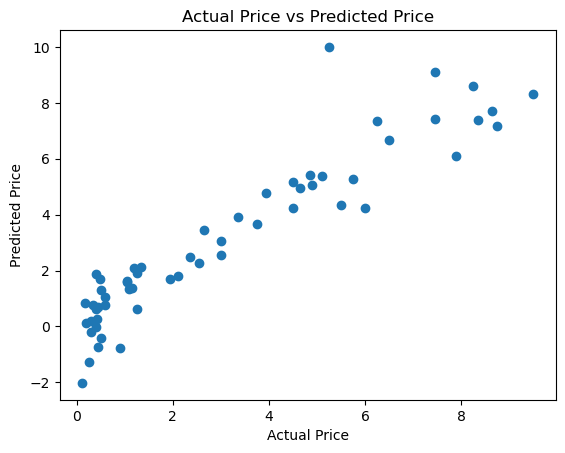

In [246]:
# Linear Regression model prediction comparison
plt.scatter(y_test,predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

**Most of the values are closer to each other.**

# Lasso Regression

In [247]:
model = Lasso()
model.fit(x_train,y_train)

Lasso()

**Model Evaluation**

In [248]:
predict = model.predict(x_test)

In [249]:
error_score = metrics.r2_score(y_test, predict)
print('R squared error: ', error_score)

R squared error:  0.7882816311250918


# Best random_state value for r2_score

In [250]:
scores=[]
for i in range(1000):
    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Car_Name','Selling_Price']),
                                                        df['Selling_Price'],
                                                        test_size = 0.2, random_state=i)
    model = Lasso()
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    
    scores.append(metrics.r2_score(y_test, predict))

In [251]:
print('Best random_state value with highest r2_score: ',np.argmax(scores))
print('Best r2_score: ', scores[np.argmax(scores)])

Best random_state value with highest r2_score:  712
Best r2_score:  0.906304243092314


**Model has best trained**

# Visualisation

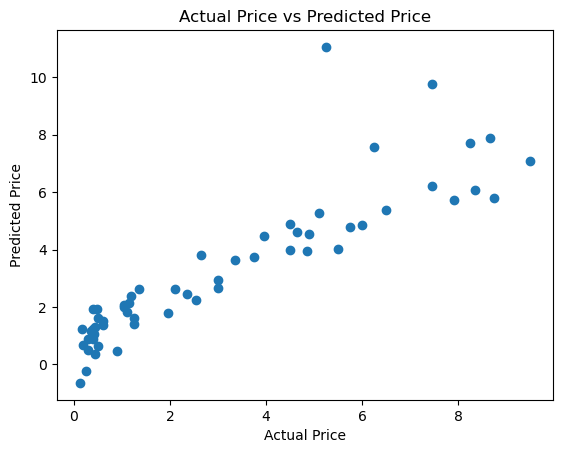

In [252]:
# Linear Regression model prediction comparison
plt.scatter(y_test,predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

**Most of the values are closer to each other in LASSO REGRESSION.**

# SUMMARY

1.**Data Cleaning**: We started with a car price dataset and applied data cleaning rules. This likely involved removing unnecessary columns or features that don't contribute to the task.

2.**Outlier Removal**: We removed outliers from the dataset. Outliers are data points that significantly deviate from the majority of the data and can have a disproportionate impact on a model. Removing them helps improve model performance.

3.**Data Transformation**: We performed data transformation, which include operations like encoding categorical variables.

4.**Data Analysis**: We conducted data analysis, which included exploring the dataset, visualizing distributions, and relationships between variables. This step helped us understand the data better.

5.**Model Training**: We trained two regression models: Linear Regression and Lasso Regression. 

6.**Random State Optimization**: We wrote code to find the best random state value for our models. The random state value is often used to control the randomness in the model's training process. By trying different random state values and evaluating model performance, we aimed to find the one that provided the best results.

7.**Model Evaluation**: We evaluated the performance of both the Linear Regression and Lasso Regression models. It was found that the **Lasso Regression** model outperformed the Linear Regression model.

8.**Visualization**: We visualized the results of both models, which likely included visualizing predicted vs. actual car prices.

In summary, We applied a thorough data preprocessing and cleaning process, conducted data analysis, and trained regression models to predict car prices. By optimizing the random state and evaluating model performance, we found that the Lasso Regression model was more effective at making accurate predictions compared to the Linear Regression model. This analysis and modeling process is a common approach in machine learning to develop predictive models based on real-world data.

# END